In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def createFrame(filename: str):
    df = pd.read_csv(filename)
    df['WCT_AVG'] = df[['t1', 't2', 't3', 't4', 't5']].mean(axis=1)
    t_serial = df.loc[0, 'WCT_AVG']
    df['Speedup'] = t_serial / df['WCT_AVG']
    df['strong_scaling'] = df['Speedup'] / df['p']
    return df


In [3]:
server_df = createFrame("./raw/server_results.csv")
vm_df = createFrame("./raw/vm_results.csv")
mac_df = createFrame("./raw/mac_results.csv")

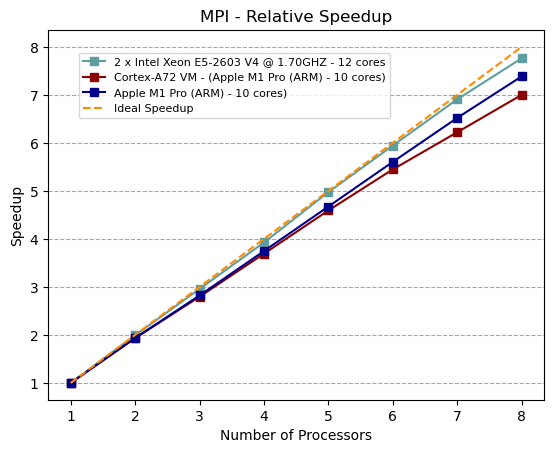

In [4]:
# Plot the speedup for each data frame
plt.plot(server_df["p"], server_df["Speedup"], marker='s', color='cadetblue', linestyle='-', label='2 x Intel Xeon E5-2603 V4 @ 1.70GHZ - 12 cores')
plt.plot(vm_df["p"], vm_df["Speedup"], marker='s', color='darkred', linestyle='-', label='Cortex-A72 VM - (Apple M1 Pro (ARM) - 10 cores)')
plt.plot(mac_df["p"], mac_df["Speedup"], marker='s', color='darkblue', linestyle='-', label='Apple M1 Pro (ARM) - 10 cores)')

# Plot the ideal speedup
plt.plot([server_df["p"].min(), server_df["p"].max()], [server_df["p"].min(), server_df["p"].max()], color='darkorange', linestyle='--', label='Ideal Speedup')

# Add the legend and labels
plt.legend(loc='center left', bbox_to_anchor=(0.05, 0.85), prop={'size': 8})
plt.title("MPI - Relative Speedup")
plt.xlabel("Number of Processors")
plt.ylabel("Speedup")
plt.grid(True, linestyle='--', color='gray', axis='y', alpha=0.7)

plt.show()

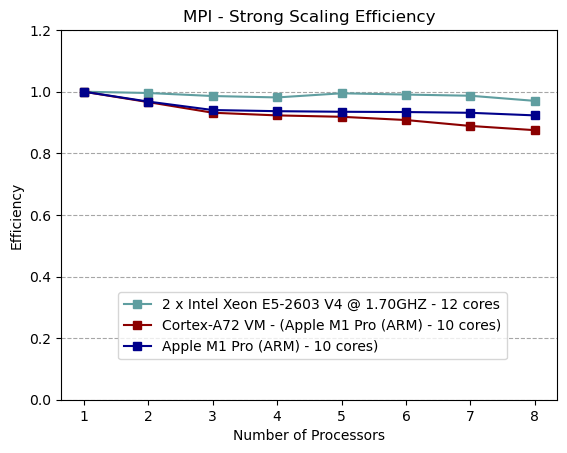

In [5]:
plt.plot(server_df["p"], server_df["strong_scaling"], marker='s', color='cadetblue', linestyle='-', label='2 x Intel Xeon E5-2603 V4 @ 1.70GHZ - 12 cores')
plt.plot(vm_df["p"], vm_df["strong_scaling"], marker='s', color='darkred', linestyle='-', label='Cortex-A72 VM - (Apple M1 Pro (ARM) - 10 cores)')
plt.plot(mac_df["p"], mac_df["strong_scaling"], marker='s', color='darkblue', linestyle='-', label='Apple M1 Pro (ARM) - 10 cores)')

plt.legend(loc='center left', bbox_to_anchor=(0.1, 0.2))
plt.title("MPI - Strong Scaling Efficiency")
plt.xlabel("Number of Processors")
plt.ylabel("Efficiency")

plt.gca().set_ylim(bottom=0, top=1.2)
plt.grid(True, linestyle='--', color='gray', axis='y', alpha=0.7)

In [6]:
def createWeakDf(path:str):
    df = createFrame(path)
    df['weak_scaling'] = df.loc[0, 'WCT_AVG'] / df['WCT_AVG']
    return df

In [7]:
# weak scaling analysis
mac_weak = createWeakDf("./raw/mac_weak.csv")
server_weak = createWeakDf("./raw/server_weak.csv")
vm_weak = createWeakDf("./raw/vm_weak.csv")

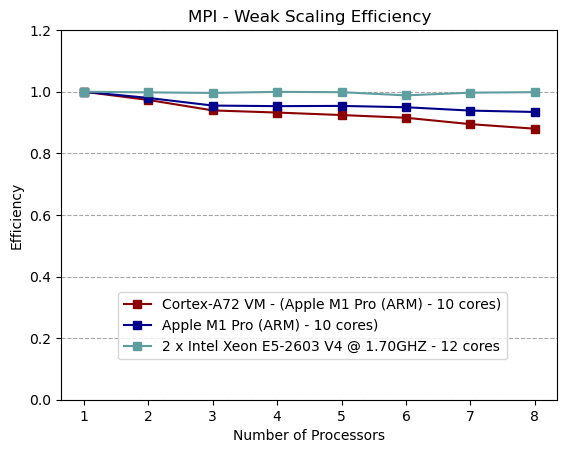

In [8]:
plt.plot(vm_weak["p"], vm_weak['weak_scaling'], marker="s", color="darkred", label='Cortex-A72 VM - (Apple M1 Pro (ARM) - 10 cores)')
plt.plot(mac_weak["p"], mac_weak["weak_scaling"], marker="s", color="darkblue", label='Apple M1 Pro (ARM) - 10 cores)')
plt.plot(server_weak["p"], server_weak["weak_scaling"], marker='s', color='cadetblue', linestyle='-', label='2 x Intel Xeon E5-2603 V4 @ 1.70GHZ - 12 cores')

plt.legend(loc='center left', bbox_to_anchor=(0.1, 0.2))
plt.title("MPI - Weak Scaling Efficiency")
plt.xlabel("Number of Processors")
plt.ylabel("Efficiency")

plt.gca().set_ylim(bottom=0, top=1.2)
plt.grid(True, linestyle="--", color="gray", axis='y', alpha=0.7)


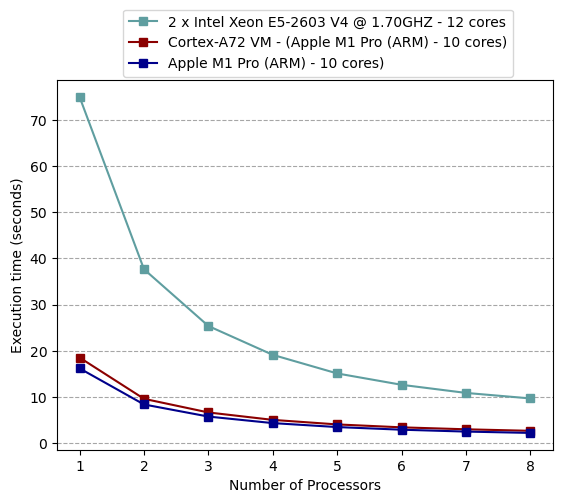

In [9]:
plt.plot(server_df["p"], server_df["WCT_AVG"], marker='s', color='cadetblue', linestyle='-', label='2 x Intel Xeon E5-2603 V4 @ 1.70GHZ - 12 cores')
plt.plot(vm_df["p"], vm_df["WCT_AVG"], marker='s', color='darkred', linestyle='-', label='Cortex-A72 VM - (Apple M1 Pro (ARM) - 10 cores)')
plt.plot(mac_df["p"], mac_df["WCT_AVG"], marker='s', color='darkblue', linestyle='-', label='Apple M1 Pro (ARM) - 10 cores)')

plt.legend(loc='center left', bbox_to_anchor=(0.120, 1.1))
plt.xlabel("Number of Processors")
plt.ylabel("Execution time (seconds)")
plt.grid(True, linestyle='--', color='gray', axis='y', alpha=0.7)